In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

sns.set_style('darkgrid')

# Context

In [2]:
data = pd.read_csv('train.csv', index_col = 0)

# Data quality assessment

In [3]:
# познакомимся с данными
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [4]:
data.shape
# вывод: датасет содержит информацию о 100000 пассажирах по 11 признакам

(100000, 11)

## Очистка данных

In [5]:
data.info()
# вывод: в столбцах 'Age', 'Ticket', 'Fare', 'Cabin', 'Embarked' есть пропущенные значения

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  object 
 4   Age       96708 non-null   float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Ticket    95377 non-null   object 
 8   Fare      99866 non-null   float64
 9   Cabin     32134 non-null   object 
 10  Embarked  99750 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 9.2+ MB


In [6]:
# проверим данные на дубликаты
data.duplicated(keep=False).sum()
# вывод: дубликатов нет

0

In [7]:
# в столбце 'Cabin' очень много пропущенных значений
# столбцы 'Name' и 'Ticket' не имеют для нас информационой пользы
# удалим эти столбцы из датасета
useless_columns = ['Name', 'Ticket', 'Cabin']
data = data.drop(columns=useless_columns)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
0,1,1,male,NaN,2,0,27.14,S
1,0,3,male,NaN,0,0,13.35,S
2,0,3,male,0.33,1,2,71.29,S
3,0,3,male,19.00,0,0,13.04,S
4,1,3,male,25.00,0,0,7.76,S


### Исследуем правильность введения данных каждого признака

In [8]:
data['Survived'].value_counts()
# вывод: все данные введены верно

0    57226
1    42774
Name: Survived, dtype: int64

In [9]:
data['Pclass'].value_counts()
# вывод: все данные введены верно

3    41006
1    30315
2    28679
Name: Pclass, dtype: int64

In [10]:
data['Sex'].value_counts()
# вывод: все данные введены верно

male      56114
female    43886
Name: Sex, dtype: int64

In [11]:
# введем кодировку пола, чтобы затем можно было обрабатывать этот столбец как числовой
data['SexCode'] = data['Sex'].apply(lambda x: 1 if x == 'female' else 0)

In [12]:
# выделим категорию 'дети' - пассажиры младше 15 лет
data['SexGroup'] = data['Sex']
data.loc[data['Age'] < 15, 'SexGroup'] = 'child'
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,SexCode,SexGroup
PassengerId,,,,,,,,,,
0,1,1,male,NaN,2,0,27.14,S,0,male
1,0,3,male,NaN,0,0,13.35,S,0,male
2,0,3,male,0.33,1,2,71.29,S,0,child
3,0,3,male,19.00,0,0,13.04,S,0,male
4,1,3,male,25.00,0,0,7.76,S,0,male
...,...,...,...,...,...,...,...,...,...,...
99995,1,2,female,62.00,0,0,14.86,C,1,female
99996,0,2,male,66.00,0,0,11.15,S,0,male
99997,0,3,male,37.00,0,0,9.95,S,0,male


In [13]:
data['Age'].value_counts()
# вывод: очень много разных значений и, как мы помним, есть пропущенные

25.0    2354
23.0    2345
26.0    2320
24.0    2298
27.0    2088
        ... 
14.5       1
74.5       1
78.5       1
13.5       1
87.0       1
Name: Age, Length: 173, dtype: int64

In [14]:
# пропущенные данные возраста заменим на медиану:
data['Age'].fillna(data['Age'].median(), inplace=True)

In [15]:
# проверим, что нет незаполненных значений в столбце 'Age'
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare        134
Embarked    250
SexCode       0
SexGroup      0
dtype: int64

In [16]:
# создадим категории по возрасту - 'AgeGroup': 0-10 лет, 11-20 лет итд.
data['AgeGroup'] = data['Age'].map(lambda age: int(age // 10) + 1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,SexCode,SexGroup,AgeGroup
PassengerId,,,,,,,,,,,
0,1,1,male,39.00,2,0,27.14,S,0,male,4
1,0,3,male,39.00,0,0,13.35,S,0,male,4
2,0,3,male,0.33,1,2,71.29,S,0,child,1
3,0,3,male,19.00,0,0,13.04,S,0,male,2
4,1,3,male,25.00,0,0,7.76,S,0,male,3


In [17]:
data['SibSp'].value_counts()
# вывод: все данные введены верно

0    73308
1    19758
2     3703
3     1635
4     1168
8      296
5      132
Name: SibSp, dtype: int64

In [18]:
data['Parch'].value_counts()
# вывод: все данные введены верно

0    73540
1    12996
2    11236
3      983
4      446
5      331
9      264
6      204
Name: Parch, dtype: int64

In [19]:
# введем дополнительную переменную 'FamilySize' - количество родственников на борту корабля 
# она нам понадобится в дальнейшем
data['FamilySize'] = data['SibSp'] + data['Parch']
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,SexCode,SexGroup,AgeGroup,FamilySize
PassengerId,,,,,,,,,,,,
0,1,1,male,39.00,2,0,27.14,S,0,male,4,2
1,0,3,male,39.00,0,0,13.35,S,0,male,4,0
2,0,3,male,0.33,1,2,71.29,S,0,child,1,3
3,0,3,male,19.00,0,0,13.04,S,0,male,2,0
4,1,3,male,25.00,0,0,7.76,S,0,male,3,0


In [20]:
data['Fare'].value_counts()
# вывод: в этом столбце есть пропущенные значения

9.85      87
9.27      87
9.79      86
9.20      85
9.18      83
          ..
297.17     1
191.64     1
39.50      1
214.92     1
4.06       1
Name: Fare, Length: 15935, dtype: int64

In [21]:
# заменим пропущенные данные на медиану:
data['Fare'].fillna(data['Fare'].median(), inplace=True)

In [22]:
# проверим, что нет незаполненных значений в столбце 'Fare'
data.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age             0
SibSp           0
Parch           0
Fare            0
Embarked      250
SexCode         0
SexGroup        0
AgeGroup        0
FamilySize      0
dtype: int64

In [23]:
# создадим категории по стоимости билетов по 50 ден. ед. - столбец 'FareGroup':
data['FareGroup'] = data['Fare'].map(lambda age: int(age // 50) + 1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,SexCode,SexGroup,AgeGroup,FamilySize,FareGroup
PassengerId,,,,,,,,,,,,,
0,1,1,male,39.00,2,0,27.14,S,0,male,4,2,1
1,0,3,male,39.00,0,0,13.35,S,0,male,4,0,1
2,0,3,male,0.33,1,2,71.29,S,0,child,1,3,2
3,0,3,male,19.00,0,0,13.04,S,0,male,2,0,1
4,1,3,male,25.00,0,0,7.76,S,0,male,3,0,1


In [24]:
data['FareGroup'].value_counts()

1     78619
2     11685
3      3233
5      2415
4      1604
6      1066
9       279
7       261
10      256
8       239
11      171
12       96
13       40
14       24
15       12
Name: FareGroup, dtype: int64

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Survived    100000 non-null  int64  
 1   Pclass      100000 non-null  int64  
 2   Sex         100000 non-null  object 
 3   Age         100000 non-null  float64
 4   SibSp       100000 non-null  int64  
 5   Parch       100000 non-null  int64  
 6   Fare        100000 non-null  float64
 7   Embarked    99750 non-null   object 
 8   SexCode     100000 non-null  int64  
 9   SexGroup    100000 non-null  object 
 10  AgeGroup    100000 non-null  int64  
 11  FamilySize  100000 non-null  int64  
 12  FareGroup   100000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 10.7+ MB


In [26]:
data['Embarked'].value_counts()
# вывод: в этом столбце есть пропущенные значения, меньше 1% от общего числа строк
# мы удалим строки с пропущенными данными

S    72139
C    22187
Q     5424
Name: Embarked, dtype: int64

In [27]:
data.dropna(subset=['Embarked'], inplace=True)

In [28]:
# убедимся, что больше нет пропущенных данных
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
SexCode       0
SexGroup      0
AgeGroup      0
FamilySize    0
FareGroup     0
dtype: int64

In [29]:
data.head(15)
# вывод: теперь наши данные готовы для визуализации

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,SexCode,SexGroup,AgeGroup,FamilySize,FareGroup
PassengerId,,,,,,,,,,,,,
0,1,1,male,39.00,2,0,27.14,S,0,male,4,2,1
1,0,3,male,39.00,0,0,13.35,S,0,male,4,0,1
2,0,3,male,0.33,1,2,71.29,S,0,child,1,3,2
3,0,3,male,19.00,0,0,13.04,S,0,male,2,0,1
4,1,3,male,25.00,0,0,7.76,S,0,male,3,0,1
5,0,2,male,35.00,0,0,6.71,S,0,male,4,0,1
6,0,3,male,7.00,0,0,9.77,S,0,child,1,0,1
7,1,3,female,6.00,1,2,31.50,S,1,child,1,3,1
8,0,1,male,27.00,2,1,73.02,S,0,male,3,3,2


# Data exploration

## Исследования каждой индивидуальной переменной

### Переменная 'Survived'

<AxesSubplot:title={'center':'Number of survived and non-survived passengers'}, xlabel='Survived', ylabel='count'>

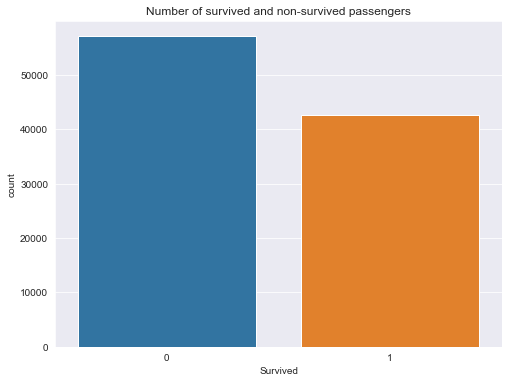

In [30]:
plt.figure(figsize=(8,6))
plt.title("Number of survived and non-survived passengers")
sns.countplot(x="Survived", data=data)
# вывод: выживших пассажиров меньше

### Переменная 'Pclass'

<AxesSubplot:title={'center':'Number of passengers, by class'}, xlabel='Pclass', ylabel='count'>

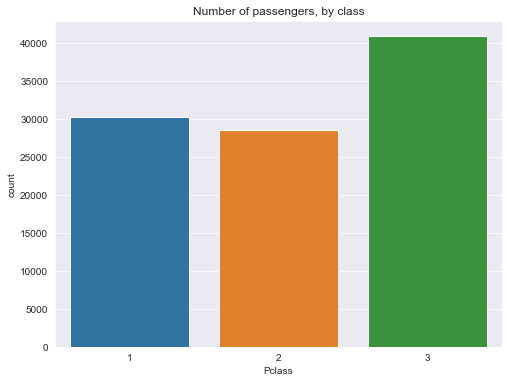

In [31]:
plt.figure(figsize=(8,6))
plt.title('Number of passengers, by class')
sns.countplot(x="Pclass", data=data)
# вывод: пассажиров третьего класса, т.е. бедных, было больше всего

### Переменная 'Sex'

<AxesSubplot:title={'center':'Number of passengers, by sex'}, xlabel='Sex', ylabel='count'>

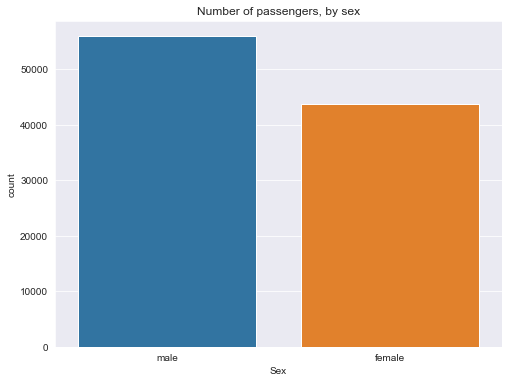

In [32]:
plt.figure(figsize=(8,6))
plt.title('Number of passengers, by sex')
sns.countplot(x="Sex", data=data)
# вывод: пассажиров-мужчин было больше

<AxesSubplot:title={'center':'Number of passengers, by sex and children'}, xlabel='SexGroup', ylabel='count'>

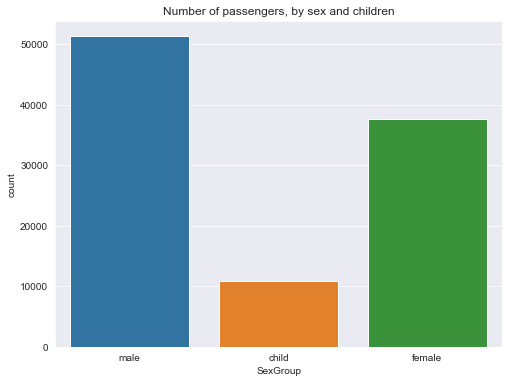

In [33]:
plt.figure(figsize=(8,6))
plt.title('Number of passengers, by sex and children')
sns.countplot(x="SexGroup", data=data)
# вывод: пассажиры-дети составляли меньше половины от числа пассажиров-женщин

### Переменная 'Age'

<AxesSubplot:title={'center':'Number of passengers, by age'}, xlabel='AgeGroup', ylabel='count'>

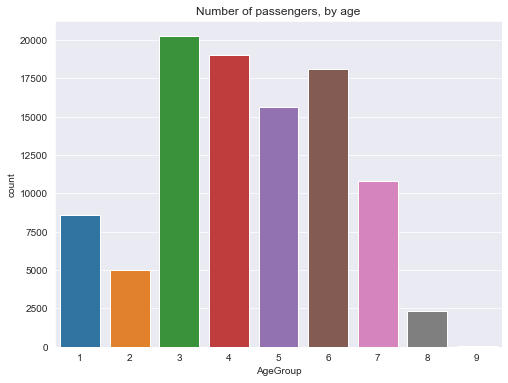

In [34]:
plt.figure(figsize=(8,6))
plt.title('Number of passengers, by age')
sns.countplot(x="AgeGroup", data=data)
# вывод: большинство пассажиров были в возрасте от 20 до 60 лет, достаточно много детей до 10 лет

Text(0.5, 1.0, 'Number of passengers, by age')

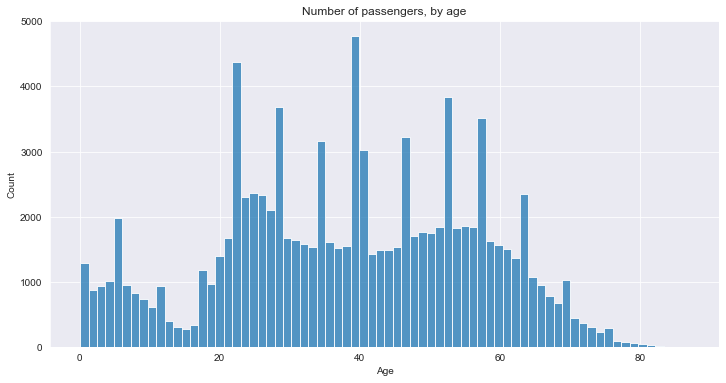

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(data=data, x="Age")
plt.title('Number of passengers, by age')
# вывод: есть отдельные категории возрастов - около 22, 30, 35, 40 итп., 
# по которым много значений - возможно, это из-за округления возраста при записи данных

### Переменная 'SibSp'

<AxesSubplot:title={'center':'Passengers with siblings or spouses'}, xlabel='SibSp', ylabel='count'>

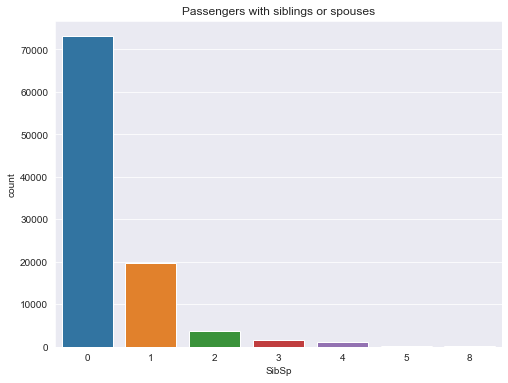

In [36]:
plt.figure(figsize=(8,6))
plt.title('Passengers with siblings or spouses')
sns.countplot(x="SibSp", data=data)
# вывод: большинство пассажиров ехало в одиночку

### Переменная 'Parch'

<AxesSubplot:title={'center':'Passengers with children'}, xlabel='Parch', ylabel='count'>

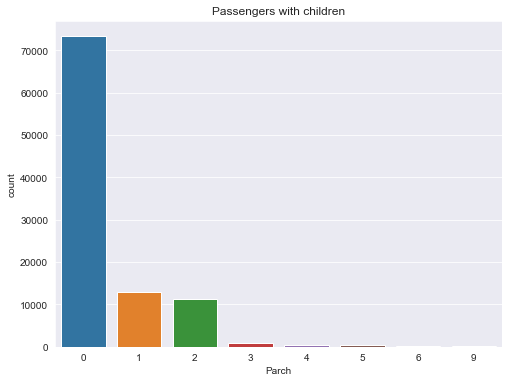

In [37]:
plt.figure(figsize=(8,6))
plt.title('Passengers with children')
sns.countplot(x="Parch", data=data)
# вывод: большинство пассажиров ехало в одиночку, следующая по размеру категория - с одним или двумя детьми

### Переменная 'Fare'

Text(0.5, 1.0, "Ticket's fare")

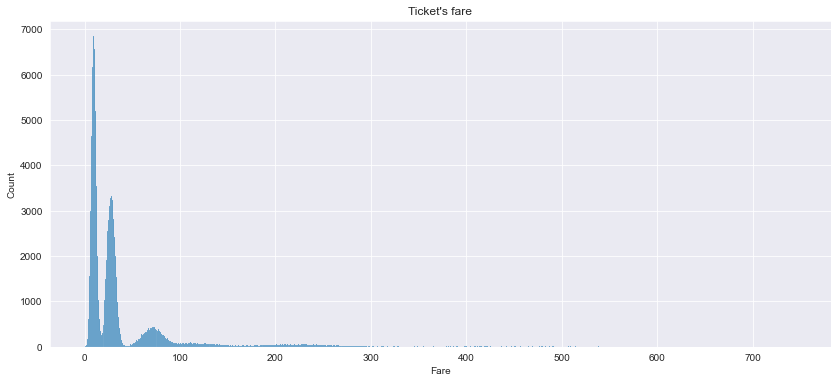

In [38]:
plt.figure(figsize=(14,6))
sns.histplot(data=data, x="Fare")
plt.title("Ticket's fare")
# вывод: большинство купленных билетов имели стоимость до 50 ден. ед.
# следующая группа - 50-100 ден. ед.
# имеются билеты до 300 ден. ед.
# есть выбросы до 700 ден. ед.

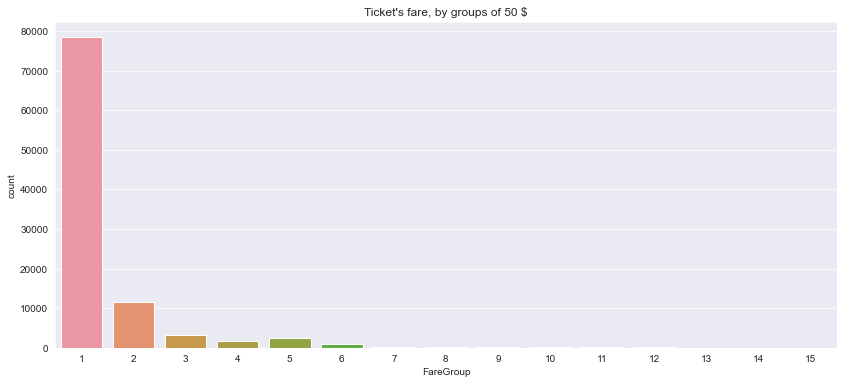

In [39]:
# посмотрим по группам по стоимости (каждая группа - 50 ден.ед.)
plt.figure(figsize=(14,6))
plt.title("Ticket's fare, by groups of 50 $")
ax = sns.countplot(x="FareGroup", data=data)
# вывод: повторяет предыдущий
# большинство купленных билетов имели стоимость до 50 ден. единиц

### Переменная 'Embarked'

<AxesSubplot:title={'center':'Number of embarked passengers, by ports'}, xlabel='Embarked', ylabel='count'>

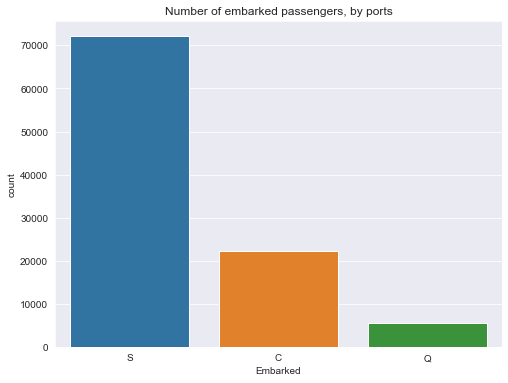

In [40]:
plt.figure(figsize=(8,6))
plt.title('Number of embarked passengers, by ports')
sns.countplot(x="Embarked", data=data)
# вывод: большинство пассажиров село в первом порту

## Исследование взяимосвязи между каждой переменной и целевой переменной 'Survived'

### Переменные 'Pclass' - 'Survived'

Text(0.5, 0.98, 'Survived and non-survived passengers, by class')

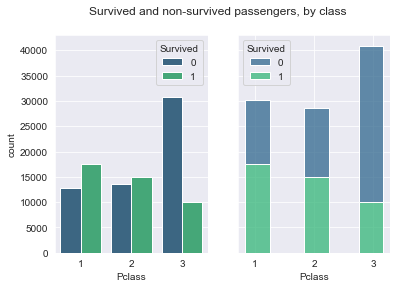

In [41]:
fig, axes = plt.subplots(1, 2, sharey=True)
sns.countplot(ax=axes[0], x="Pclass", hue='Survived', data=data, palette="viridis")
sns.histplot(ax=axes[1], data=data, x='Pclass', hue='Survived', multiple="stack", shrink=5, palette="viridis")
fig.suptitle('Survived and non-survived passengers, by class')
# вывод: в первом классе выживших больше, чем не выживших, во втором примено поровну, 
# в третьем (самом большом) большинство не выжили

### Переменные 'Sex' - 'Survived'

Text(0.5, 0.98, 'Survived and non-survived passengers, by sex and children')

<Figure size 1008x720 with 0 Axes>

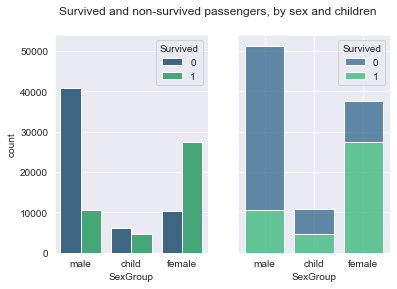

In [42]:
plt.figure(figsize=(14,10))
fig, axes = plt.subplots(1, 2, sharey=True)
sns.countplot(ax=axes[0], x="SexGroup", hue='Survived', data=data, palette="viridis")
sns.histplot(ax=axes[1], data=data, x='SexGroup', hue='Survived', multiple="stack", shrink=0.8, palette="viridis")
fig.suptitle('Survived and non-survived passengers, by sex and children')
# вывод: мужчины скорее не выжили, женщины скорее выжили, дети примерно поровну

### Переменные 'Age' - 'Survived'

<AxesSubplot:title={'center':'Survived and non-survived passengers, by age'}, xlabel='AgeGroup', ylabel='count'>

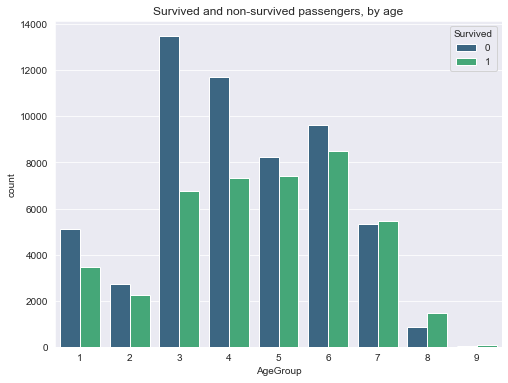

In [43]:
plt.figure(figsize=(8,6))
plt.title('Survived and non-survived passengers, by age')
sns.countplot(x="AgeGroup", hue='Survived', data=data, palette="viridis")
# вывод: больше всего процент выживших среди пожилых пассажиров и подростков, 
# меньше всего процент выживших в категории 20-40 лет

Text(0.5, 1.0, 'Survived and non-survived passengers, by age')

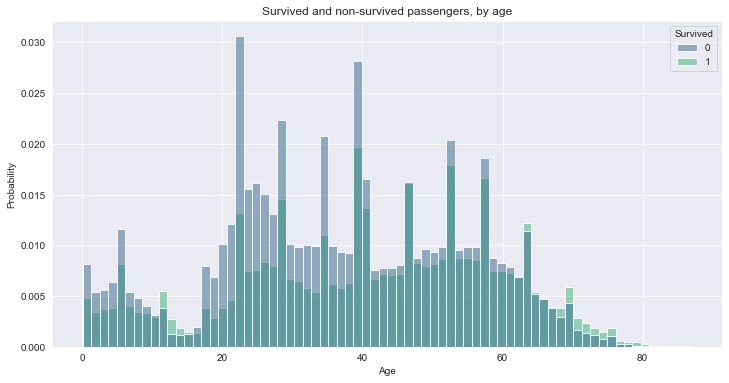

In [44]:
plt.figure(figsize=(12,6))
sns.histplot(data=data, x="Age", hue='Survived', stat='probability', palette="viridis")
plt.title('Survived and non-survived passengers, by age')
# вывод: тот же - больше всего процент выживших среди пожилых пассажиров и подростков, 
# меньше всего процент выживших в категории 20-40 лет

### Переменные 'SibSp' - 'Survived'

<AxesSubplot:title={'center':'Survived and non-survived passengers, by presence of siblings and spouses'}, xlabel='SibSp', ylabel='count'>

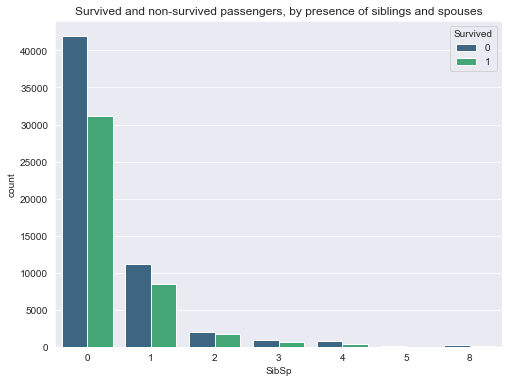

In [45]:
plt.figure(figsize=(8,6))
plt.title('Survived and non-survived passengers, by presence of siblings and spouses')
sns.countplot(x="SibSp", hue='Survived', data=data, palette="viridis")
# вывод: от количества членов семьи также зависит выживаемость
# у тех, кто ехал вдвоем-втроем, была больше вероятность выжить

### Переменные 'Parch' - 'Survived'

<AxesSubplot:title={'center':'Survived and non-survived passengers, by presence of parents and children'}, xlabel='Parch', ylabel='count'>

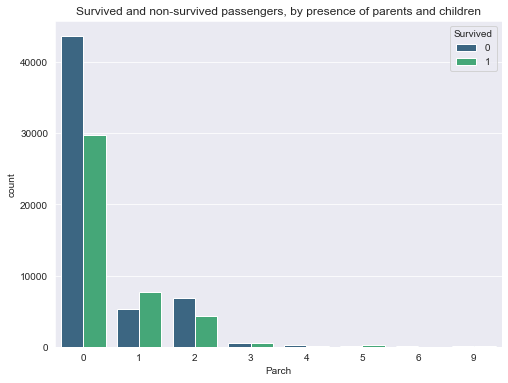

In [46]:
plt.figure(figsize=(8,6))
plt.title('Survived and non-survived passengers, by presence of parents and children')
sns.countplot(x="Parch", hue='Survived', data=data, palette="viridis")
# вывод: от количества членов семьи также зависит выживаемость
# пассажиры с одним ребёнком или родителем чаще выживали

### Переменные 'FamilySize' - 'Survived'¶

Text(0.5, 1.0, 'Survival Rate of passengers, by family size')

<Figure size 720x576 with 0 Axes>

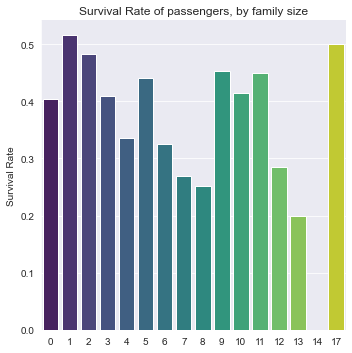

In [47]:
# посмотрим влияние на выживаемость введенной нами переменной 'FamilySize'
plt.figure(figsize=(10,8)) 
sns.catplot(x="FamilySize", y="Survived", data=data, kind="bar", ci=None, palette="viridis")\
            .set_axis_labels("", "Survival Rate")
plt.title('Survival Rate of passengers, by family size')
# вывод: на выживаемость отрицательно влияет как отсутствие родственников, так и большое их количество

### Переменные 'Fare' - 'Survived'

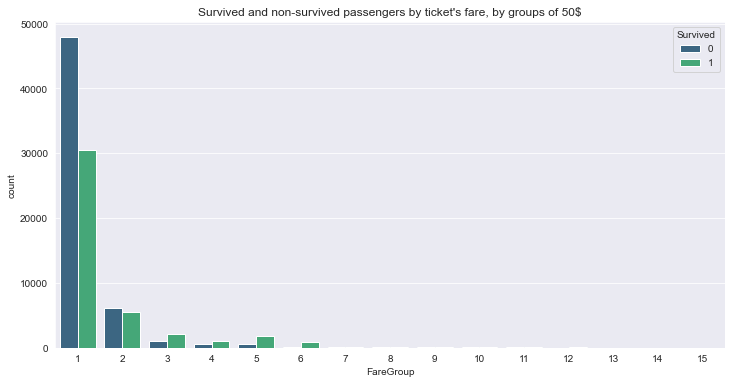

In [48]:
# посмотрим по группам по стоимости (каждая группа - 50 ден.ед.)
plt.figure(figsize=(12,6))
plt.title("Survived and non-survived passengers by ticket's fare, by groups of 50$")
ax = sns.countplot(x="FareGroup", hue='Survived', data=data, palette="viridis")
# вывод: пассажиры с более дорогими билетами скорее выжили

### Переменные 'Embarked' - 'Survived'

<AxesSubplot:title={'center':'Survived and non-survived passengers, by ports'}, xlabel='Embarked', ylabel='count'>

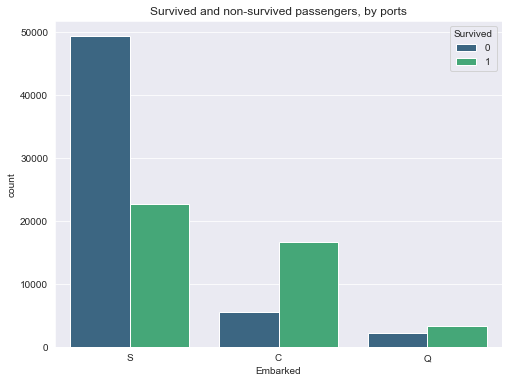

In [49]:
plt.figure(figsize=(8,6))
plt.title('Survived and non-survived passengers, by ports')
sns.countplot(x="Embarked", hue='Survived', data=data, palette="viridis")
# вывод: пассажиры, севшие на корабль во втором и третьем порту, скорее выжили

## Исследование взаимосвязей между несколькими переменными

### Variable 'Pclass' with others

<AxesSubplot:title={'center':'Number of passengers, by class and sex'}, xlabel='Pclass', ylabel='count'>

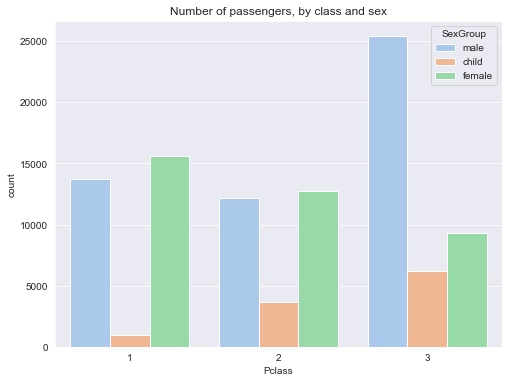

In [50]:
plt.figure(figsize=(8,6))
plt.title("Number of passengers, by class and sex")
sns.countplot(x="Pclass", hue="SexGroup", data=data, palette="pastel")
# вывод: в первом классе ехало чуть больше женщин, чем мужчин и совсем мало детей
# во втором классе женщин и мужчин примерно одинаковое число, дети - меньше половины от него
# в третьем классе ехало больше всего мужчин

<AxesSubplot:title={'center':'Number of passengers, by class and age'}, xlabel='Count', ylabel='Pclass'>

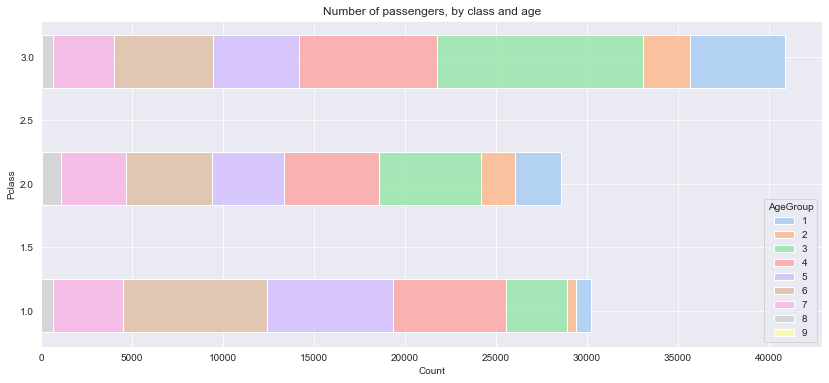

In [51]:
plt.figure(figsize=(14,6))
plt.title("Number of passengers, by class and age")
sns.histplot(data=data, y='Pclass', hue='AgeGroup', \
             multiple="stack", shrink=5, palette="pastel")
# вывод: в первом классе основная часть пассажиров в возрасте 40-60 лет
# во втором классе примерно равные групы всех возрастов
# в третьем классе самая большая группа людей от 20 до 30 лет

Text(0.5, 1.0, 'Number of passengers, by class and age')

<Figure size 576x432 with 0 Axes>

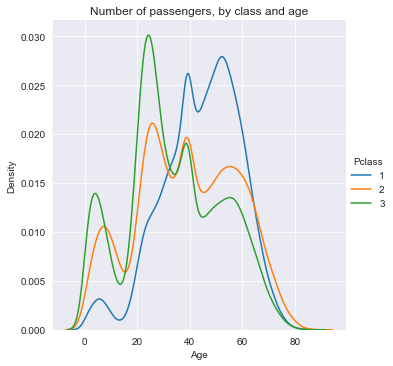

In [52]:
# посмотрим на возраст точнее
plt.figure(figsize=(8,6))
sns.FacetGrid(data=data, hue='Pclass', legend_out=True, height=5).map(sns.kdeplot, 'Age').add_legend()
plt.title("Number of passengers, by class and age")
# вывод: тот же - в первом классе основная часть пассажиров в возрасте 40-60 лет
# во втором классе примерно равные групы всех возрастов
# в третьем классе самая большая группа людей от 20 до 30 лет

<AxesSubplot:title={'center':'Number of passengers, by class and presence of siblings and spouses'}, xlabel='Pclass', ylabel='count'>

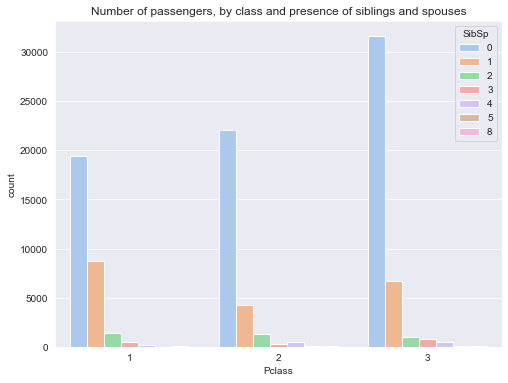

In [53]:
plt.figure(figsize=(8,6))
plt.title("Number of passengers, by class and presence of siblings and spouses")
sns.countplot(x="Pclass", hue="SibSp", data=data, palette="pastel")
# вывод: во всех классах большинство пассажиров ехало в одиночку, 
# вторая по численности группа - с одним супругом или родственником

<AxesSubplot:title={'center':'Number of passengers, by class and presence of parents and children'}, xlabel='Pclass', ylabel='count'>

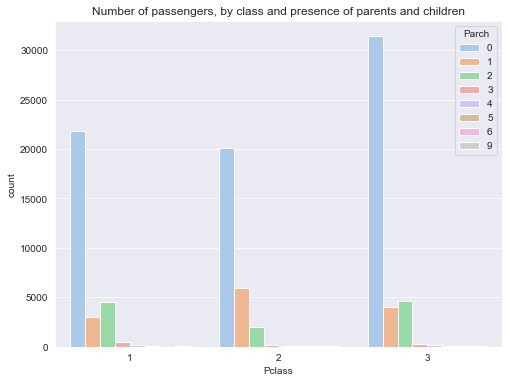

In [54]:
plt.figure(figsize=(8,6))
plt.title("Number of passengers, by class and presence of parents and children")
sns.countplot(x="Pclass", hue="Parch", data=data, palette="pastel")
# вывод: во всех классах большинство пассажиров ехало без детей,
# следующие по численности группы - в первом и третьем классе - с двумя детьми,
# во втором - с одним ребенком

<AxesSubplot:title={'center':'Number of passengers, by class and fare'}, xlabel='Count', ylabel='Pclass'>

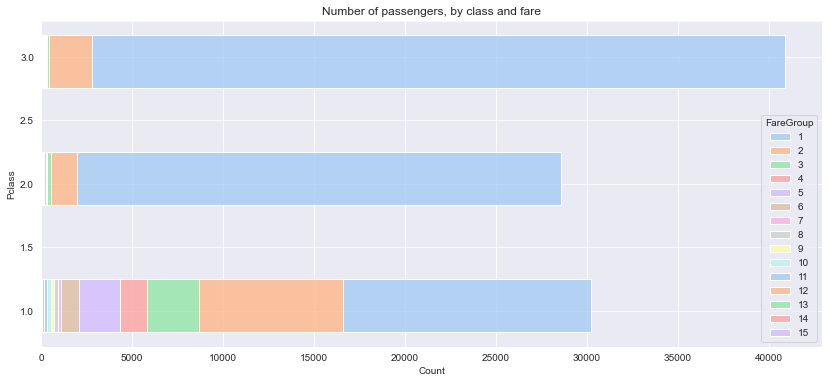

In [55]:
plt.figure(figsize=(14,6))
plt.title("Number of passengers, by class and fare")
sns.histplot(data=data, y='Pclass', hue='FareGroup',
             multiple="stack", shrink=5, palette="pastel")
# вывод: в первом классе около половины билетов стоили до 50 ден.ед., четверть 50-100, достаточно много дорогих
# во втором и третьем классах в основном билеты стоили до 50, вторая гораздо меньшая группа - 50-100

<AxesSubplot:title={'center':'Number of passengers, by class and port'}, xlabel='Pclass', ylabel='count'>

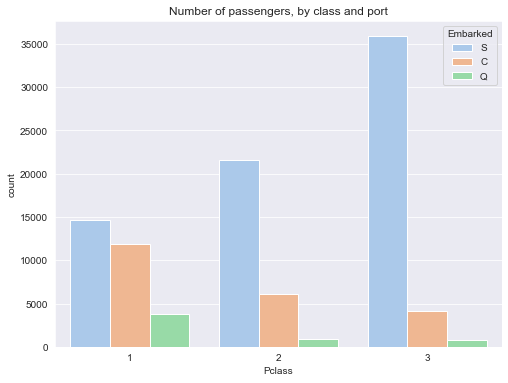

In [56]:
plt.figure(figsize=(8,6))
plt.title("Number of passengers, by class and port")
sns.countplot(x="Pclass", hue='Embarked', data=data, palette="pastel")
# вывод: пассажиры первого класса садились в первом и во втором порту
# пассажиры второго и третьего класса в основном садились в первом порту

### Variable 'Sex' with others

<AxesSubplot:title={'center':'Number of passengers, by sex and age'}, xlabel='Count', ylabel='SexGroup'>

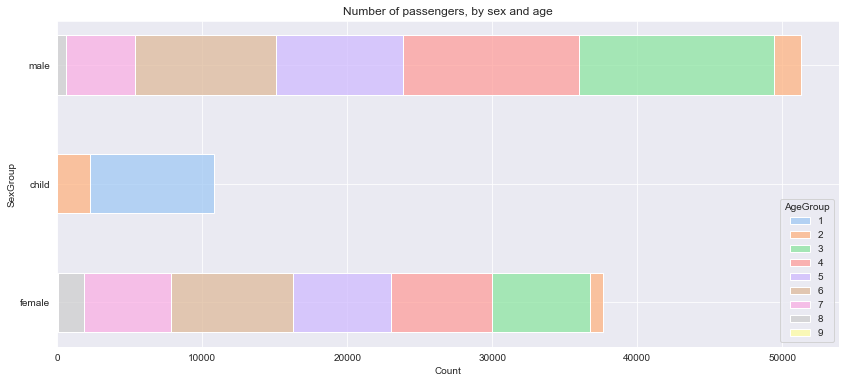

In [57]:
plt.figure(figsize=(14,6))
plt.title("Number of passengers, by sex and age")
sns.histplot(data=data, y='SexGroup', hue='AgeGroup', \
             multiple="stack", shrink=0.5, palette="pastel")
# вывод: большая часть детей до 10 лет
# женщин примерное одинаковое число для каждой возрастной группы
# мужчин больше всего до 30 лет, и меньшая часть пожилых

<AxesSubplot:title={'center':'Number of passengers, by sex and presence of siblings and spouses'}, xlabel='SexGroup', ylabel='count'>

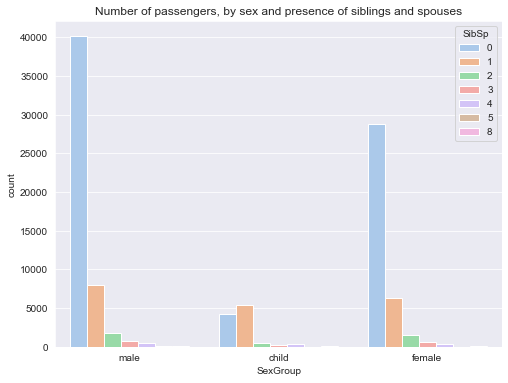

In [58]:
plt.figure(figsize=(8,6))
plt.title("Number of passengers, by sex and presence of siblings and spouses")
sns.countplot(x="SexGroup", hue="SibSp", data=data, palette="pastel")
# вывод: и мужчины, и женщины в основном ехали в одиночку, 
# и, что удивительно, дети - наверное это подростки, так как группа 'дети' - до 14 лет
# вторая по численности группа - с одним супругом или родственником

<AxesSubplot:title={'center':'Number of passengers, by sex and presence of parents and children'}, xlabel='SexGroup', ylabel='count'>

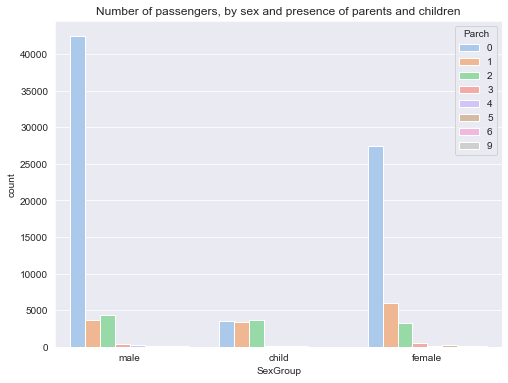

In [59]:
plt.figure(figsize=(8,6))
plt.title("Number of passengers, by sex and presence of parents and children")
sns.countplot(x="SexGroup", hue="Parch", data=data, palette="pastel")
# вывод: и мужчины, и женщины, и дети в основном ехали в одиночку, 
# следующая по численности группа - с одним ребенком или родителем

<AxesSubplot:title={'center':'Number of passengers, by sex and fare'}, xlabel='Count', ylabel='SexGroup'>

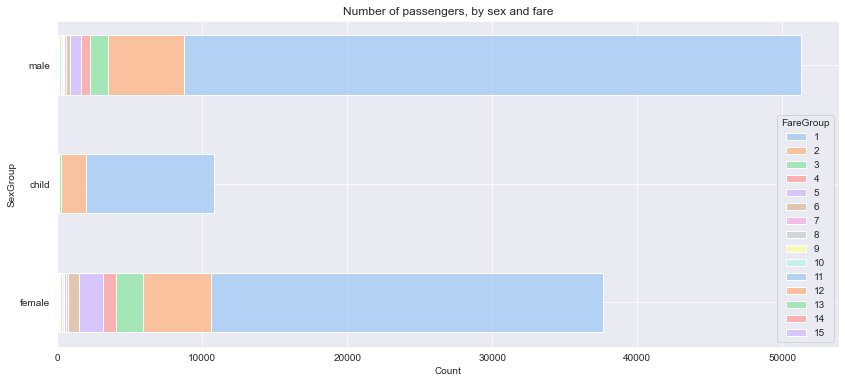

In [60]:
plt.figure(figsize=(14,6))
plt.title("Number of passengers, by sex and fare")
sns.histplot(data=data, y='SexGroup', hue='FareGroup',
             multiple="stack", shrink=0.5, palette="pastel")
# вывод: во всех трёх группах по полу большинство билетов стоили до 50 ден.ед., 
# следующая гораздо меньшая группа - 50-100 ден.ед.

<AxesSubplot:title={'center':'Number of passengers, by sex and port'}, xlabel='SexGroup', ylabel='count'>

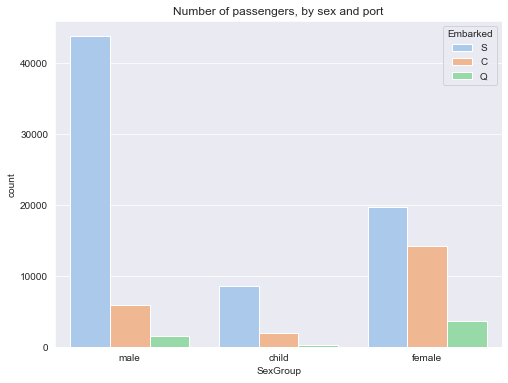

In [61]:
plt.figure(figsize=(8,6))
plt.title("Number of passengers, by sex and port")
sns.countplot(x="SexGroup", hue='Embarked', data=data, palette="pastel")
# вывод: мужчины и дети в основном садились в первом порту
# женщины в основном садились в первом и во втором порту

### Variable 'Age' with others

<AxesSubplot:title={'center':'Number of passengers, by age and presence of siblings and spouses'}, xlabel='AgeGroup', ylabel='count'>

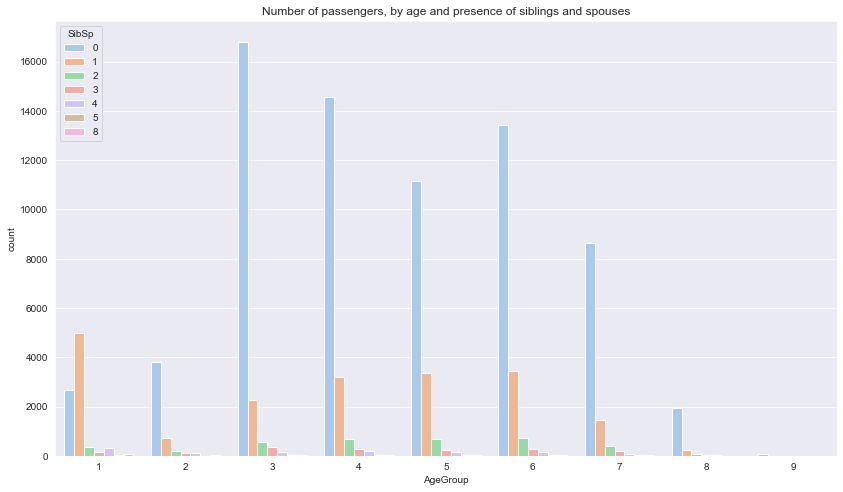

In [62]:
plt.figure(figsize=(14,8))
plt.title("Number of passengers, by age and presence of siblings and spouses")
sns.countplot(x="AgeGroup", hue="SibSp", data=data, palette="pastel")
# вывод: и мужчины, и женщины в основном ехали в одиночку
# детей с родственниками больше
# группа молодых людей до 20 лет и группа совсем пожилых людей - практически всегда без супругов

<AxesSubplot:title={'center':'Number of passengers, by age and presence of parents and children'}, xlabel='AgeGroup', ylabel='count'>

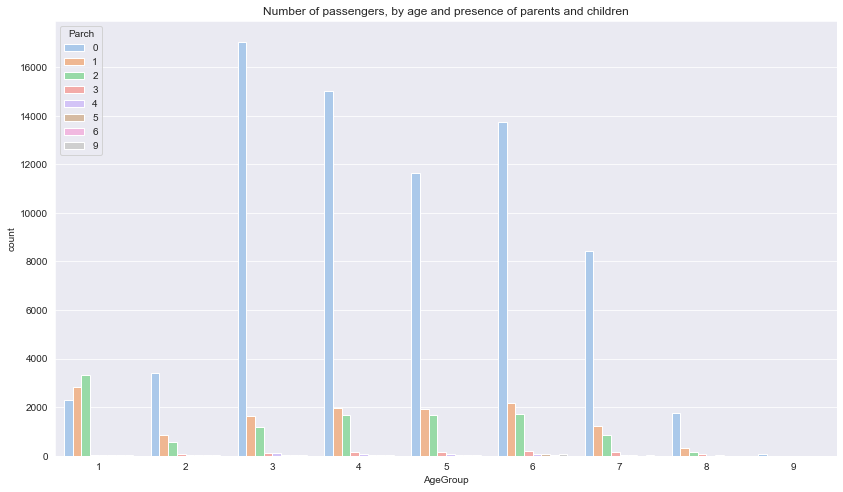

In [63]:
plt.figure(figsize=(14,8))
plt.title("Number of passengers, by age and presence of parents and children")
sns.countplot(x="AgeGroup", hue="Parch", data=data, palette="pastel")
# вывод: и мужчины, и женщины в основном ехали в одиночку, 
# дети до 10 лет - с одним или двумя родителями
# у молодых людей до 20 лет детей практически не было

<AxesSubplot:title={'center':'Number of passengers, by age and fare'}, xlabel='Count', ylabel='AgeGroup'>

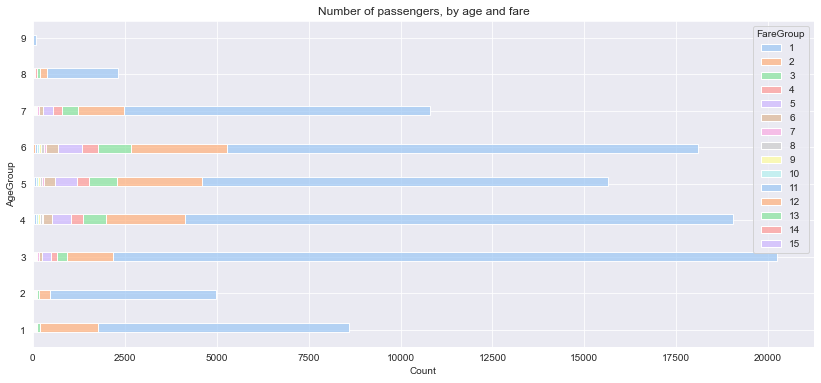

In [64]:
plt.figure(figsize=(14,6))
plt.title("Number of passengers, by age and fare")
sns.histplot(data=data, y='AgeGroup', hue='FareGroup',
             multiple="stack", shrink=2, palette="pastel")
# вывод: видим, что выводы повторятся:
# во всех возврастных группах билеты стоили в основном до 50 ден.ед., 
# следующая гораздо меньшая группа - 50-100 ден.ед.
# пассажиры от 20 до 70 лет чаще могли себе позволить купить дорогой билет 

<AxesSubplot:title={'center':'Number of passengers, by age and port'}, xlabel='AgeGroup', ylabel='count'>

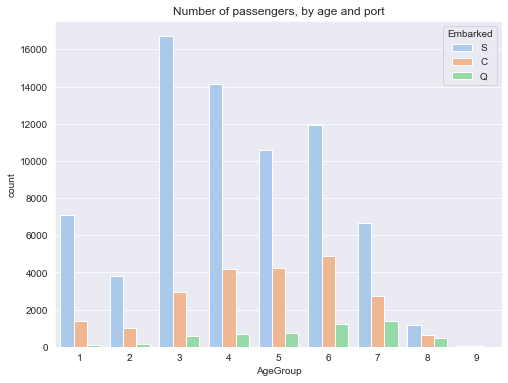

In [65]:
plt.figure(figsize=(8,6))
plt.title("Number of passengers, by age and port")
sns.countplot(x="AgeGroup", hue='Embarked', data=data, palette="pastel")
# вывод: молодые люди в основном садились в первом порту
# доля садившихся во втором и в третьем порту увеличивается с возрастом пассажиров 

<AxesSubplot:title={'center':'Number of passengers, by age and port'}, xlabel='Count', ylabel='AgeGroup'>

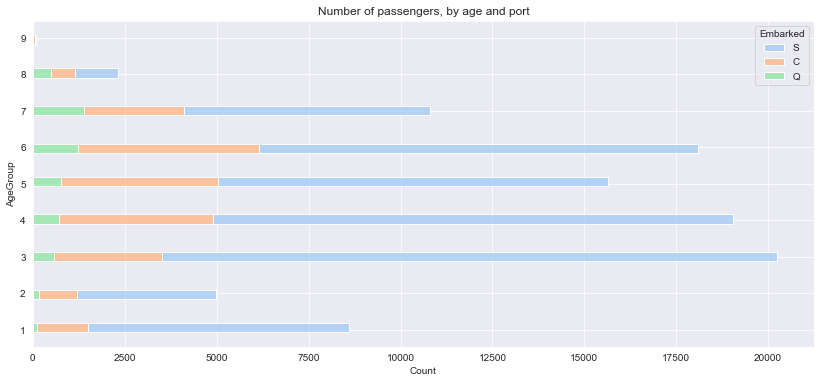

In [66]:
# другой взгляд
plt.figure(figsize=(14,6))
plt.title("Number of passengers, by age and port")
sns.histplot(data=data, y='AgeGroup', hue='Embarked',\
             multiple="stack", shrink=2, palette="pastel")
# вывод: тот же - молодые люди в основном садились в первом порту
# доля садившихся во втором и в третьем порту увеличивается с возрастом пассажиров 

### Variable 'SibSp' with others

<AxesSubplot:title={'center':'Number of passengers, by presence of siblings and spouses and by presence of parents and children'}, xlabel='Count', ylabel='SibSp'>

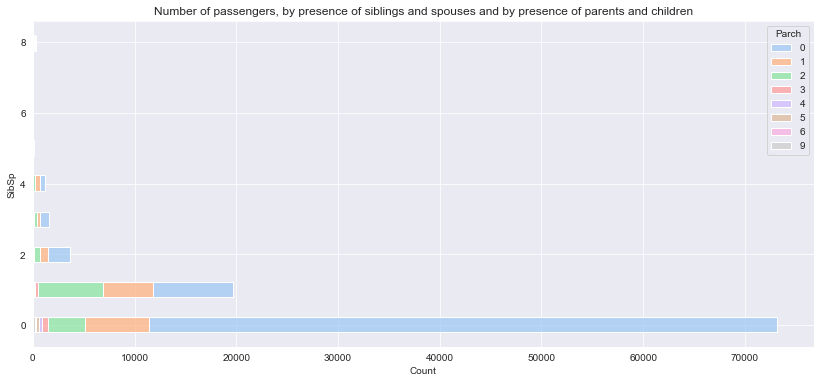

In [67]:
plt.figure(figsize=(14,6))
plt.title("Number of passengers, by presence of siblings and spouses and by presence of parents and children")
sns.histplot(data=data, y='SibSp', hue='Parch',\
             multiple="stack", shrink=10, palette="pastel")
# вывод: большинство пассажиров ехало без родственников и без детей
# следующие по численности группы - пассажир с супругом, пассажир с одним ребенком, 
# пассажир с супругом и одним ребенком и пассажир с супругом и двумя детьми

<AxesSubplot:title={'center':'Number of passengers, by presence of siblings and spouses and fare'}, xlabel='Count', ylabel='SibSp'>

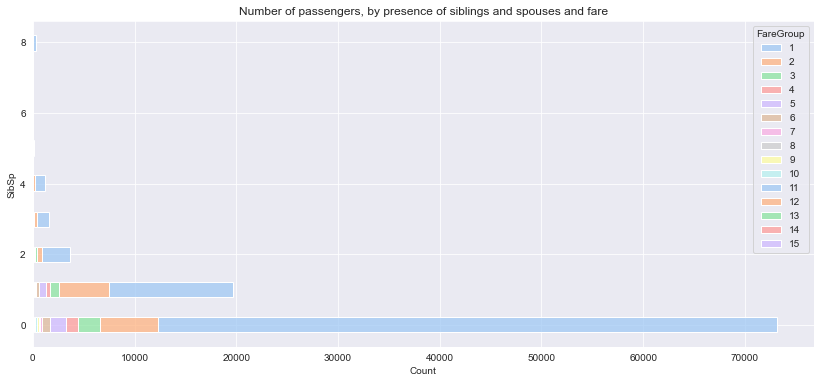

In [68]:
plt.figure(figsize=(14,6))
plt.title("Number of passengers, by presence of siblings and spouses and fare")
sns.histplot(data=data, y='SibSp', hue='FareGroup',\
             multiple="stack", shrink=10, palette="pastel")
# вывод: ничего нового, 
# во всех группах билеты стоили до 50 ден.ед., следующая гораздо меньшая группа - 50-100 ден.ед.
# кто ехал один, чаще купили дорогие билеты

<AxesSubplot:title={'center':'Number of passengers, by presence of siblings and spouses and by port'}, xlabel='SibSp', ylabel='count'>

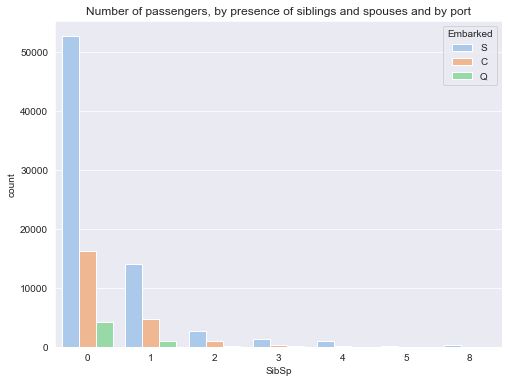

In [69]:
plt.figure(figsize=(8,6))
plt.title("Number of passengers, by presence of siblings and spouses and by port")
sns.countplot(x="SibSp", hue='Embarked', data=data, palette="pastel")
# вывод: распределение садившихся в разных портах примерно одинаково для всех подгрупп с родственниками

### Variable 'Parch' with others

<AxesSubplot:title={'center':'Number of passengers, by presence of parents and children and by fare'}, xlabel='Count', ylabel='Parch'>

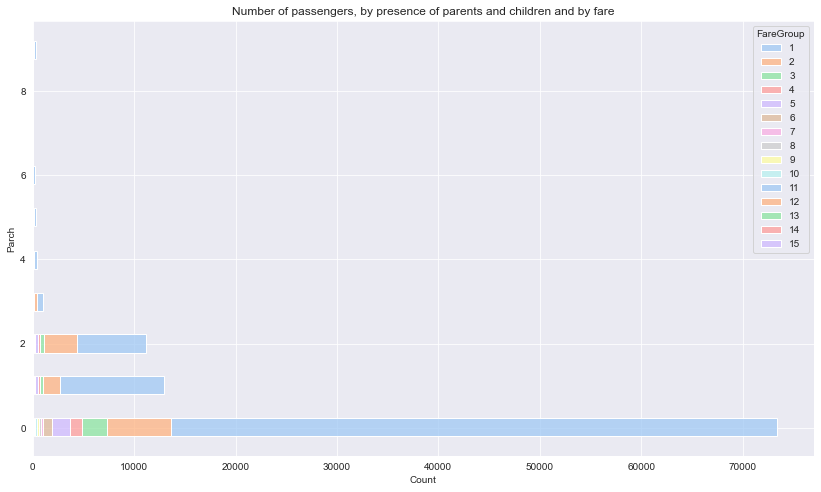

In [70]:
plt.figure(figsize=(14,8))
plt.title("Number of passengers, by presence of parents and children and by fare")
sns.histplot(data=data, y='Parch', hue='FareGroup',\
             multiple="stack", shrink=10, palette="pastel")
# вывод: повторяет предыдущие выводы
# во всех группах большинство билетов стоило до 50 ден.ед., следующая гораздо меньшая группа - 50-100 ден.ед.
# пассажиры с одним ребенком гораздо чаще покупали самый дешёвый билет
# кто ехал один, чаще купили дорогие билеты

<AxesSubplot:title={'center':'Number of passengers, by presence of parents and children and by port'}, xlabel='Parch', ylabel='count'>

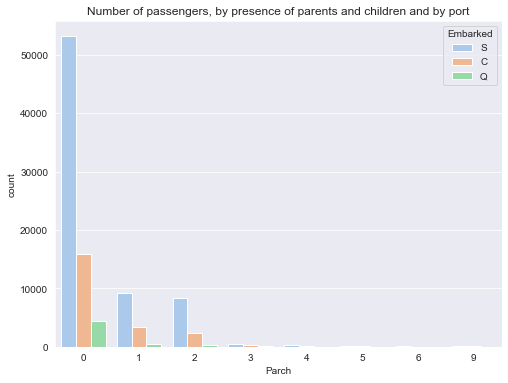

In [71]:
plt.figure(figsize=(8,6))
plt.title("Number of passengers, by presence of parents and children and by port")
sns.countplot(x="Parch", hue='Embarked', data=data, palette="pastel")
# вывод: распределение садившихся в разных портах примерно одинаково для всех подгрупп с детьми

### Variable 'Fare' with others

<AxesSubplot:title={'center':'Number of passengers, by fare and by port'}, xlabel='Count', ylabel='Embarked'>

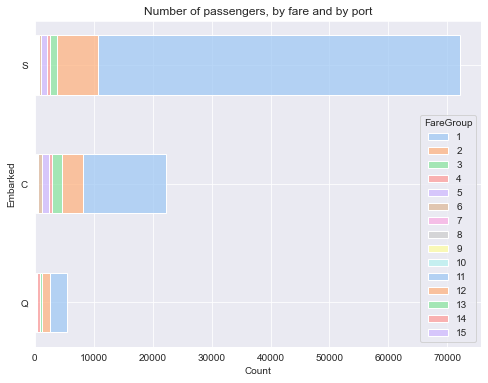

In [72]:
plt.figure(figsize=(8,6))
plt.title("Number of passengers, by fare and by port")
sns.histplot(data=data, y='Embarked', hue='FareGroup',\
             multiple="stack", shrink=0.5, palette="pastel")
# вывод: в первом порту сели большинство пассажиров с дешёвыми билетами
# во втором порту доля дорогих билетов была выше

## Исследование взаимосвязей между целевой переменной 'Survived' и несколькими переменными

### 'Survived' - 'Pclass' - 'Sex'

Text(0.5, 1.0, 'Survived passengers, by sex and class')

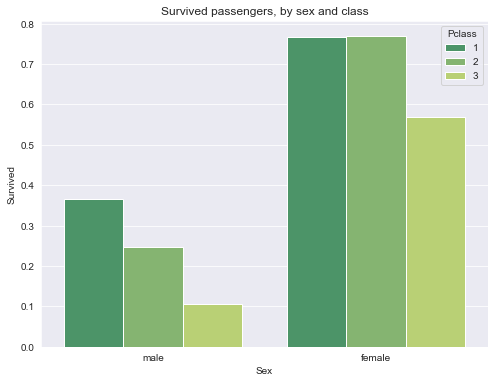

In [73]:
plt.figure(figsize=(8,6))
sns.barplot(x="Sex", y="Survived", hue='Pclass', data=data, ci=None, palette="summer");
plt.title("Survived passengers, by sex and class")
# вывод: женщины первого и второго класса более вероятно выжили
# у мужчин вероятность выжить тем выше, чем выше класс

### 'Survived' - 'Pclass' - 'Age'

Text(0.5, 1.0, 'Survived passengers, by age and class')

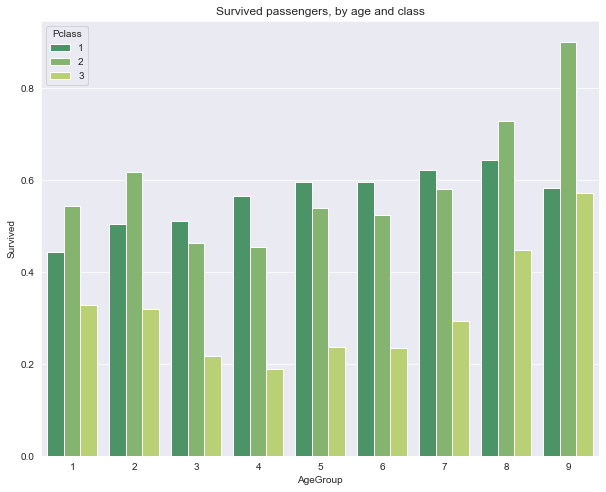

In [74]:
plt.figure(figsize=(10,8))
sns.barplot(x="AgeGroup", y="Survived", hue='Pclass', data=data, ci=None, palette="summer");
plt.title("Survived passengers, by age and class")
# вывод: во втором и третьем классах больше шансов выжить было у молодых людей до 20 лет и у пожилых старше 70
# в первом классе больше шансов выжить было у людей среднего возраста от 20 до 70 лет

### 'Survived' - 'Sex' - 'Age'

Text(0.5, 1.0, 'Survived passengers, by age and sex')

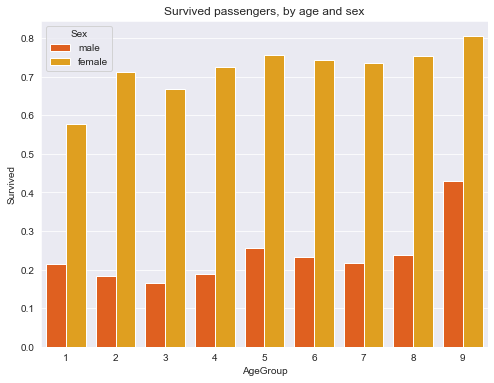

In [75]:
plt.figure(figsize=(8,6))
sns.barplot(x="AgeGroup", y="Survived", hue='Sex', data=data, ci=None, palette="autumn");
plt.title("Survived passengers, by age and sex")
# вывод: вероятность спастить по всем возрастам выше у женщин
# у мужчин вероятность выжить была чуть выше среди детей и совсем пожилых

### 'Survived' - 'Sex' - 'FamilySize'

Text(0.5, 1.0, 'Survived passengers, by sex and FamilySize')

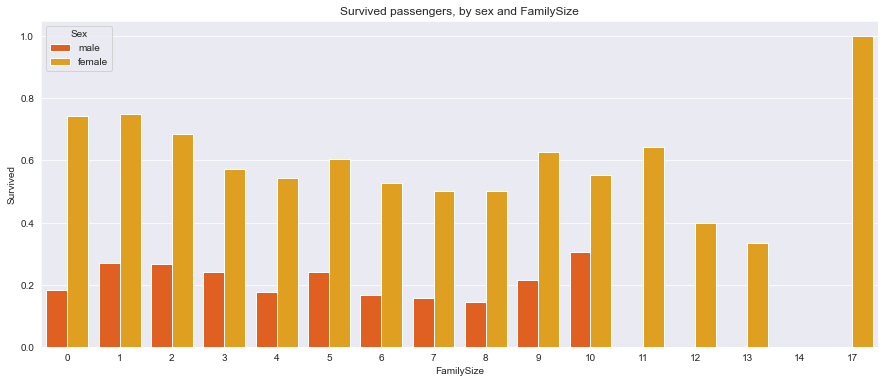

In [76]:
plt.figure(figsize=(15,6))
sns.barplot(x="FamilySize", y="Survived", hue='Sex', data=data, ci=None, palette="autumn");
plt.title("Survived passengers, by sex and FamilySize")
# вывод: у женщин из любой группы по размеру семьи была большая вероятность спастись
# причем для женщин увеличение количества родственников уменьшает вероятность выжить
# какой-то клан из 17 родственников полностью спасся
# для мужчин небольшое количество родственников увеличивает вероятность выжить
# меньше всего была вероятность выжить у мужчин-одиночек и с 4, 6, 7, 8 родственниками

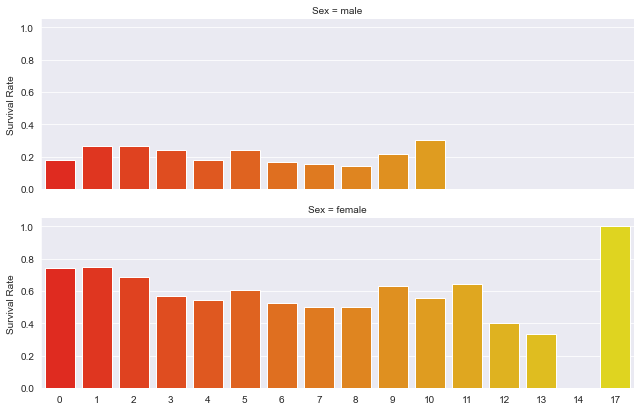

In [77]:
sns.catplot(x="FamilySize", y="Survived", row='Sex',
            data=data, kind="bar", ci=None, height=3, aspect=3, palette="autumn")\
            .set_axis_labels("", "Survival Rate")
# вывод: для женщин увеличение количества родственников уменьшает вероятность выжить
# для мужчин небольшое количество родственников увеличивает вероятность выжить

### 'Pclass' - 'Sex' - 'Age'

Text(0.5, 1.0, 'Number of passengers, by sex, age and class')

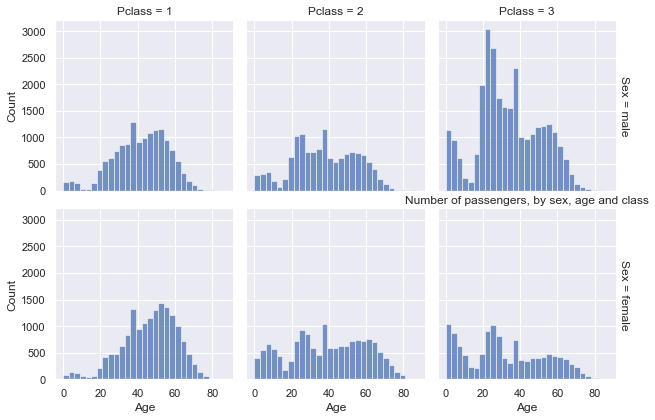

In [78]:
sns.set_theme(style="darkgrid")
sns.displot(
    data, x="Age", col="Pclass", row="Sex",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True))
plt.title("Number of passengers, by sex, age and class")
# вывод: в первом классе плыли мужчины и женщины постарше (заработали денег)
# во втором классе плыли женщины и мужчины разного возраста
# в третьем классе ехали более молодые мужчины и женщины разного возраста

# Summary

### По результатам исследования мы получили следующую картину

На корабле было больше всего пассажиров третьего класса, т.е. бедных, со стоимостью билетов до 50 ден. ед.
Пассажиров-мужчин было больше, чем пассажиров-женщин.
Пассажиры-дети составляли меньше половины от числа пассажиров-женщин.

Большинство пассажиров были в возрасте от 20 до 60 лет, большинство детей до 10 лет.
Причем женщин было примерное одинаковое число для каждой возрастной группы, а мужчин больше всего до 30 лет, и меньшая часть пожилых.

В первом классе ехало чуть больше женщин, чем мужчин и совсем мало детей. Основная часть пассажиров первого класса в возрасте 40-60 лет.
Во втором классе женщин и мужчин примерно одинаковое число равными группами по возрасту.
В третьем классе ехало больше всего мужчин, причем самая большая группа от 20 до 30 лет.

Большинство пассажиров ехало в одиночку, следующие по размеру категории - пассажир с супругом, пассажир с одним ребенком, пассажир с супругом и одним ребенком и пассажир с супругом и двумя детьми.

Большинство купленных билетов имели стоимость до 50 ден. ед., следующая по стоимости группа - 50-100 ден. ед.
Пассажиры с одним ребенком гораздо чаще покупали самый дешёвый билет.
Дорогие билеты покупали пассажиры первого класса возрастом от 20 до 70 лет, чаще, кто ехал один.

Большинство пассажиров (молодых мужчин, детей) село в первом порту, причем большинство из них были пассажирами второго и третьего класса с дешёвыми билетами.
Большая часть пассажиров первого класса и женщин садилось в первом и во втором порту. Во втором и в третьем порту садилось больше пожилых пассажиров. Во втором порту доля дорогих билетов была выше.

### Выводы по выжившим и не выжившим пассажирам

Выживших пассажиров меньше.

Мужчин больше не выжило, женщин больше выжило, дети примерно поровну.

Больше всего процент выживших среди пожилых пассажиров и подростков, меньше всего процент выживших в категории 20-40 лет.

В первом классе выживших больше, чем не выживших, во втором примено поровну, в третьем (самом большом) большинство не выжили.
Пассажиры с более дорогими билетами скорее выжили.

От количества членов семьи также зависит выживаемость: у тех, кто ехал вдвоем-втроем, была больше вероятность выжить. На выживаемость отрицательно влияет как отсутствие родственников, так и большое из количество. Для женщин увеличение количества родственников уменьшает вероятность выжить, для мужчин небольшое количество родственников увеличивает вероятность выжить.

## Окончательный вывод

Таким образом, самая большая вероятность выжить была у пожилых женщин с одним-двумя родственниками, с билетом первого класса.
Самая маленькая вероятность выжить была у мужчин 20-30 лет, плывших в одиночку, с билетом третьего класса.